# Numpy - Neural Network from Scratch

In [38]:
# Package imports
import numpy as np

In [39]:
import matplotlib
import matplotlib.pyplot as plt

In [40]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Numpy basics

1-dimension

In [41]:
a = np.array([1,2,3])
print(type(a), a)

<class 'numpy.ndarray'> [1 2 3]


In [42]:
b = np.arange(1, 5, .5)
print(b)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5]


In [43]:
b.shape

(8,)

2-dimensions

In [44]:
b = np.array([[1,2,3],[4,5,6]])

In [45]:
b

array([[1, 2, 3],
       [4, 5, 6]])

In [46]:
b.shape

(2, 3)

In [47]:
b[0][1]

2

In [48]:
b.reshape((3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [49]:
b[:2, 1:3]

array([[2, 3],
       [5, 6]])

In [50]:
b>5

array([[False, False, False],
       [False, False,  True]], dtype=bool)

In [51]:
b[b>5]

array([6])

In [52]:
a, b

(array([1, 2, 3]), array([[1, 2, 3],
        [4, 5, 6]]))

In [53]:
a.shape, b.shape

((3,), (2, 3))

In [57]:
a[np.newaxis, :]

array([[1, 2, 3]])

In [58]:
np.concatenate((a[np.newaxis, :],b), axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [59]:
np.vstack((a,b))

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [60]:
np.hstack((a[:, np.newaxis],b.T))

array([[1, 1, 4],
       [2, 2, 5],
       [3, 3, 6]])

## Generating a dataset

In [61]:
import sklearn.datasets

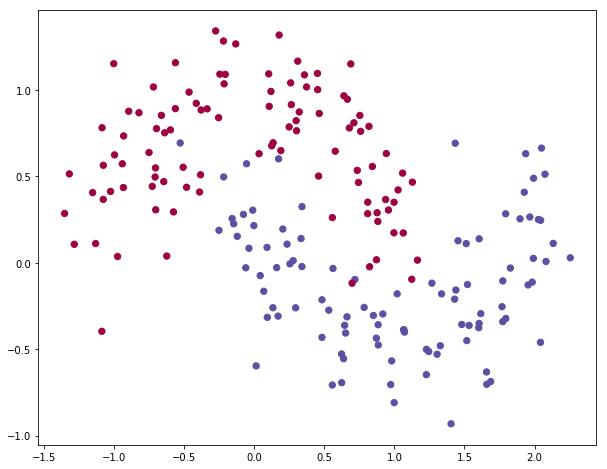

In [62]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [63]:
X.shape, y.shape

((200, 2), (200,))

## Sigmoid function

In [64]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [65]:
np.ones((1, 2))

array([[ 1.,  1.]])

In [66]:
sigmoid(np.ones((1, 2)))

array([[ 0.73105858,  0.73105858]])

In [73]:
x = np.linspace(-5, 5)

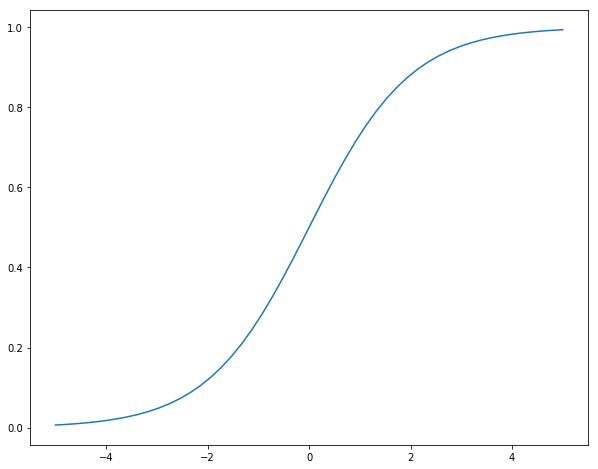

In [76]:
plt.plot(x, sigmoid(x))

In [77]:
def dsigmoid(y):
    return y * (1.0 - y)

## Perceptron

In [81]:
# initialize weights randomly with mean 0 - [-1; 1]
syn0 = 2*np.random.random((2,)) - 1 

In [87]:
syn0

array([ 0.79615572, -3.56730656])

In [88]:
for j in range(101):
    # forward propagation
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    
    # how much did we miss?
    l1_error = y - l1
    
    if (j % 100) == 0:
        print("Error:" + str(np.mean(np.abs(l1_error))))
    
    # backpropagation
    l1_delta = l1_error * dsigmoid(l1)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)

Error:0.223560621514
Error:0.176117978965


In [89]:
# Helper function to predict an output (0 or 1)
def predict(weights, x):
    prob = sigmoid(np.dot(x, weights))
    return prob.round().astype(int)

In [90]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

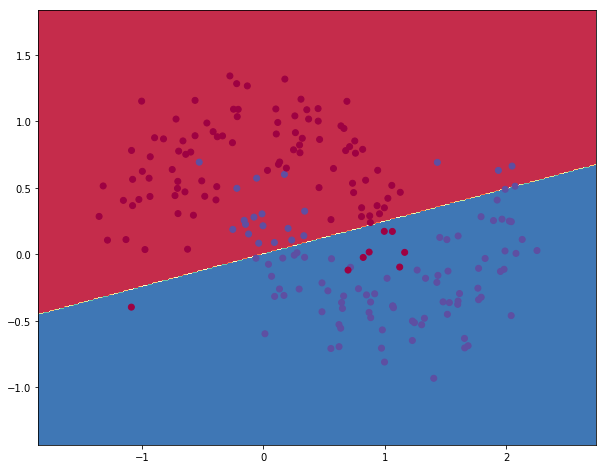

In [91]:
plot_decision_boundary(lambda x: predict(syn0, x))

## MLP

In [92]:
HIDDEN_LAYER_SIZE = 10
LEARNING_RATE = 0.1

syn0 = 2*np.random.random((2,HIDDEN_LAYER_SIZE)) - 1
syn1 = 2*np.random.random((HIDDEN_LAYER_SIZE,1)) - 1

In [93]:
%%time
for j in range(10000):
    
    # forward propagation
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = sigmoid(np.dot(l1,syn1))
    
    # how much did we miss?
    l2_error = y[:,np.newaxis] - l2
    
    if (j % 1000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
    
    # back propagation
    l2_delta = l2_error * dsigmoid(l2)
    
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * dsigmoid(l1)
    
    
    # update weights
    syn1 += LEARNING_RATE * l1.T.dot(l2_delta)
    syn0 += LEARNING_RATE * l0.T.dot(l1_delta)

Error:0.460427379735
Error:0.149584346671
Error:0.136154625846
Error:0.13151599191
Error:0.128527527553
Error:0.127767784784
Error:0.125995084228
Error:0.124696932597
Error:0.123612593701
Error:0.12268444293
CPU times: user 523 ms, sys: 8.77 ms, total: 532 ms
Wall time: 532 ms


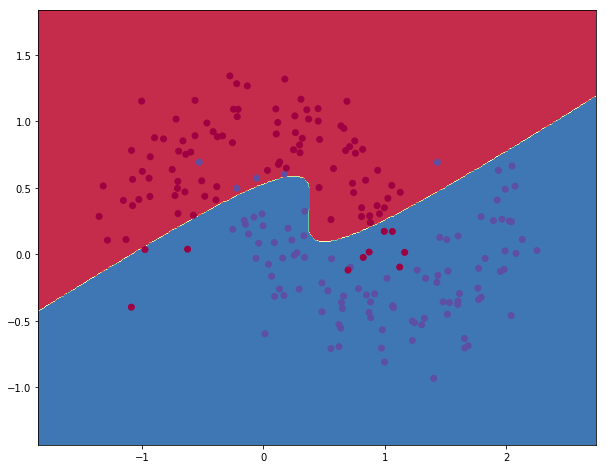

In [94]:
# Helper function to predict an output (0 or 1)
def predict(weights, x):
    l1 = sigmoid(np.dot(x, weights[0]))
    prob = sigmoid(np.dot(l1, weights[1]))
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict((syn0, syn1), x))